<a href="https://colab.research.google.com/github/suesinha/CODSOFT/blob/main/Task_4_Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("advertising.csv")
data.info()

Saving advertising.csv to advertising.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

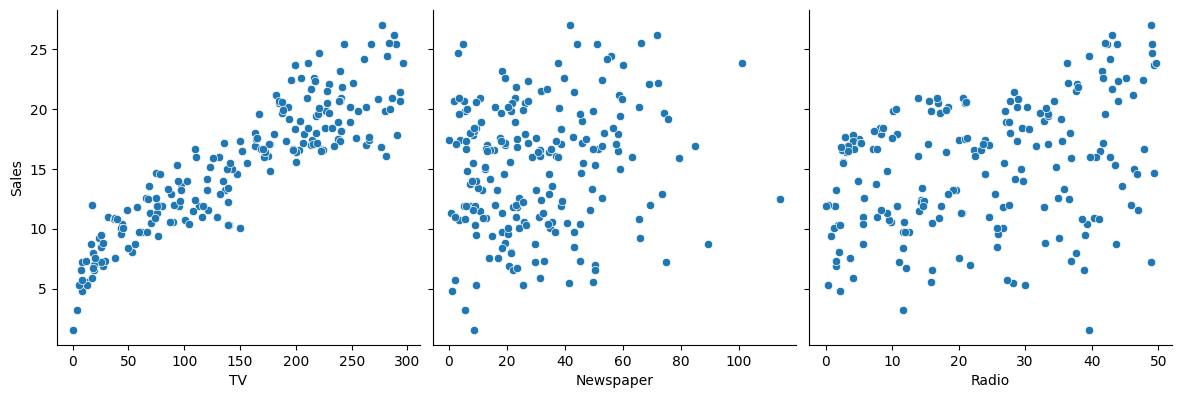

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

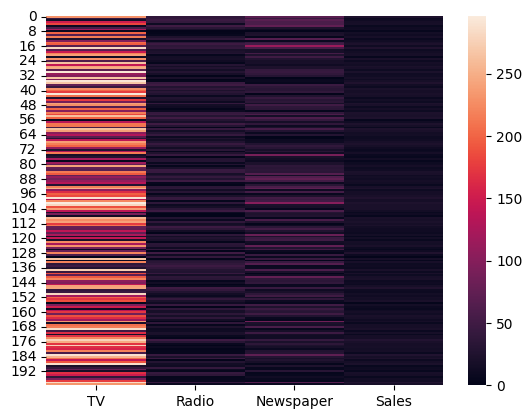

In [ ]:
sns.heatmap(data)

In [ ]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis=1), data['Sales'], test_size=0.25, random_state=42)
y_train.value_counts()

11.9    4
16.7    4
17.2    3
20.9    3
17.1    3
       ..
12.3    1
10.3    1
20.1    1
19.2    1
19.4    1
Name: Sales, Length: 99, dtype: int64

In [ ]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regression':DecisionTreeRegressor(),
    'MLP Regression' :MLPRegressor()
}
lr = LinearRegression()
dt = DecisionTreeRegressor()
nn = MLPRegressor(hidden_layer_sizes=(50, 50))

In [ ]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
    print(f'Mean Square Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print('-'*33)

using Linear Regression: 
Mean Absolute Error: 1.1199940713361773
Mean Square Error: 2.404067444711889
R2 Score: 0.9115647723992757
---------------------------------
using Decision Tree Regression: 
Mean Absolute Error: 1.372
Mean Square Error: 3.4123999999999994
R2 Score: 0.8744725854806967
---------------------------------
using MLP Regression: 
Mean Absolute Error: 3.1409324125768516
Mean Square Error: 14.78116329215873
R2 Score: 0.4562650299928733
---------------------------------


In this task, we determine that the Linear Regression Algoithm has the least value of Mean Absolute Error and Mean Square Error, which turns out to be regression algorrithm than Decision Tree Regressor and MLP Regressor, with values of 1.119 and 2.404 respectively.
The R-square value of Linear Regressor algorithm is also greatest, 0.911 (closest to 1), which shows that the model predicts 100% of the relationship.
So, we will use Linear Regression model to predict the sale.